# WorkFlow
# Load the data
## Clean the data
## Feature Enginnering
## Visualizing the data
## Preproccessing
## Modelling

## Load the data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import *
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [118]:
data = pd.read_csv('./data/raw/train.csv')
test_data = pd.read_csv('./data/raw/test.csv')
sample_sub = pd.read_csv('./data/raw/sample_submission.csv')

In [119]:
data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


## Clean the data

In [120]:
len(data)

100000

In [121]:
len(test_data)

50000

## Feature Enginnering

In [122]:
class FeatureEnginnering:
    def __init__(self, data, col):
        self.data = data
        self.col = col

    def feature_enginner(
        self, quantile=False, std_and_mean=False, verbose=False
    ) -> "feature enginnerd data":
        if quantile:
            max_no = self.data[self.col].quantile(0.99)
            min_no = self.data[self.col].quantile(0.05)
            data = self.data[self.data[self.col] < max_no]
            data = self.data[self.data[self.col] > min_no]
        if std_and_mean:
            max_no = self.data[self.col].mean() + 3 * self.data[self.col].std()
            min_no = self.data[self.col].mean() + -3 * self.data[self.col].std()
            data = self.data[self.data[self.col] < max_no]
            data = self.data[self.data[self.col] > min_no]
        return data

In [123]:
for col in data.drop(['id','target'],axis=1).columns:
    fe = FeatureEnginnering(data,col)
    data = fe.feature_enginner(quantile=True,std_and_mean=True)

In [124]:
len(data)

100000

In [125]:
fe = FeatureEnginnering(data,'id')
data = fe.feature_enginner(quantile=True,std_and_mean=True)

In [126]:
len(data)

100000

In [127]:
def object_to_int(
        data=pd.DataFrame,
        start_index=-1,
        filepath="./info.json",
        col="index",
        verbose=1,
    ) -> "Return a list and a dictionary of the object cols int converted":
        """
        verbose :
            verbose = 0 = No output
            verbose = 1 = Output
        start_index :
            it just is like the index the convertion starts at.
            ex :
                start_index = -1
                0 : first object
                1 : second object
                so and so forth
        data :
            a pd dataframe with the column
        filepath :
            the filepath that you want to save the info_dict to.
            ex :
            {0:'A',1:'B'}
        col :
            the column that you want transformed
        """
        if data[col].dtype == int or data[col].dtype == float:
            raise f"the columns that you passed are int or float type please passthrough a object type column {data[col].dtype}"
        index = start_index
        info_list = []
        info_dict = {}
        for info in data[col]:
            if info not in info_dict:
                index += 1
                info_dict[info] = index
        for info in data[col]:
            info_list.append(info_dict[info])
        print(info_dict)
        return (index, info_list, info_dict)

In [128]:
def shuffle_data(
        data, how_many_times
    ) -> "Shuffled Data for how many times you wanted":
        """
        data :
            pd.DataFrame
        how_many_times :
            how many times to shuffle
        """
        for _ in range(how_many_times):
            data = data.sample(frac=1)
        return data

In [129]:
shuffle_or_not = False

In [130]:
if shuffle_or_not is True:
    data = shuffle_data(data,100)

## Visualization

<AxesSubplot:>

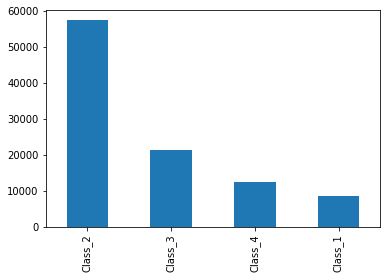

In [131]:
data['target'].value_counts().plot.bar()

In [132]:
sample_sub.head(1)

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25


## Preproccessing

In [133]:
turn_target_to_int = False

In [134]:
if turn_target_to_int is True:
    data['target'] = object_to_int(data=data,col='target',filepath='./output/target.json')[1]

In [135]:
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    LabelEncoder,
    Normalizer,
)

In [ ]:
pres = [StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),Normalizer()]

In [ ]:
X = data.drop('target',axis=1)
y = data['target']

In [ ]:
label_encoder = True

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
X_old = X

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [ ]:
cols = list(X.columns)

In [ ]:
y_old = y

In [ ]:
# X = X_old
# y = y_old
# for pre in pres:
#     ct = make_column_transformer(
#         (pre,cols)
#     )
#     ct.fit(X)
#     X = ct.transform(X)
#     ohe = OneHotEncoder()
#     ohe.fit(np.array(y).reshape(-1,1))
#     y = ohe.transform(np.array(y).reshape(-1,1))
#     y = np.argmax(y,axis=1)
#     if label_encoder is True:
#         le = LabelEncoder()
#         le.fit(y)
#         y = le.transform(y)
#     print('creating model..')
#     model = GradientBoostingClassifier()
#     print('fitting the model')
#     model.fit(X,y)
#     print('done fitting the model')
#     print(pre)
#     print(model.score(X,y))
#     X = X_old
#     y = y_old

In [ ]:
# best without label encoder = MaxAbsScaler 0.579
# best with label encoder = MaxAbsScaler

In [ ]:
X = X_old
y = y_old
ct = make_column_transformer(
    (MaxAbsScaler(),cols)
)
ct.fit(X)
X = ct.transform(X)
ohe = OneHotEncoder()
ohe.fit(np.array(y).reshape(-1,1))
y = ohe.transform(np.array(y).reshape(-1,1))
y = np.argmax(y,axis=1)
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
model = GradientBoostingClassifier()
model.fit(X,y)
print(model.score(X,y))

/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier,CatBoost

In [ ]:
models = [
    ['KNeighborsClassifier',KNeighborsClassifier],
    ['LogisticRegression',LogisticRegression],
    ['LogisticRegressionCV',LogisticRegressionCV],
    ['RidgeClassifier',RidgeClassifier],
    ['RidgeClassifierCV',RidgeClassifierCV],
    ['GaussianNB',GaussianNB],
    ['DecisionTreeClassifier',DecisionTreeClassifier],
    ['GradientBoostingClassifier',GradientBoostingClassifier],
    ['AdaBoostClassifier',AdaBoostClassifier],
    ['RandomForestClassifier',RandomForestClassifier],
    ['BaggingClassifier',BaggingClassifier],
    ['SVC',SVC],
    ['XGBClassifier',XGBClassifier],
    ['XGBRFClassifier',XGBRFClassifier],
    ['CatBoostClassifier',CatBoostClassifier],
]

In [ ]:
results = {}

In [ ]:
# for model in models:
#     print('*'*50)
#     model_name = model[0]
#     print(model_name)
#     model = model[1]()
#     model.fit(X=X_train,y=y_train)
#     preds = model.predict(X_test)
#     results[model_name] = accuracy_score(y_test,preds)
#     print('*'*50)

In [ ]:
results

In [ ]:
vc = VotingClassifier(estimators=[('CatBoostClassifier',CatBoostClassifier()),('AdaBoostClassifier',AdaBoostClassifier())],voting='soft')

In [ ]:
vc.fit(X_train,y_train)

In [ ]:
vc.score(X_test,y_test)

In [ ]:
# grid_search = {
#     'n_estimators':[25,50,75,100,125,250,500],
#     'learning_rate':[1.0,0.1,0.01,0.001,0.0001],
#     'algorithm':['SAMME','SAMME.R']
# }
# model = AdaBoostClassifier()
# model = GridSearchCV(model,grid_search,cv=round(2.5),verbose=5)
# model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
vc = VotingClassifier(estimators=[('CatBoostClassifier',CatBoostClassifier()),('AdaBoostClassifier',AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=125, random_state=None))],voting='soft')
vc.fit(X_train,y_train)
print(vc.score(X_test,y_test))

In [ ]:
model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=125, random_state=None)
model.fit(X_train,y_train)

In [ ]:
test_data_t = ct.transform(test_data)

In [ ]:
preds = model.predict_proba(test_data_t)

In [ ]:
sample_sub

In [ ]:
ids = test_data['id']

In [ ]:
class_1 = []
class_2 = []
class_3 = []
class_4 = []

In [ ]:
len(preds)

In [ ]:
for pred in preds:
    class_1.append(pred[0])
    class_2.append(pred[1])
    class_3.append(pred[2])
    class_4.append(pred[3])

In [ ]:
sample_sub

In [ ]:
len(ids)

In [ ]:
len(preds)

In [ ]:
len(class_1)

In [ ]:
submission = pd.DataFrame({'id':ids,'Class_1':class_1,'Class_2':class_2,'Class_3':class_3,'Class_4':class_4})

In [ ]:
submission.to_csv('./output/submissions/sub-1.csv',index=False)